<a href="https://colab.research.google.com/github/j28302830/Senior_Project/blob/main/recognition/NN_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn import preprocessing
import numpy as np 
from keras.models import Sequential
from keras.layers import Input, Dense
import tensorflow as tf
from sklearn.model_selection import train_test_split

In [ ]:
dataset = pd.read_csv('/content/merge_labeled.csv')

#### label coding for nominal values
def label_coding(label):
    dataset[label]= label_encoder.fit_transform(dataset[label]) 
    dataset[label].unique()
    
### label encoding
label_encoder = preprocessing.LabelEncoder() 
label_coding('Flow ID')
label_coding('Src IP')
label_coding('Dst IP')
label_coding('Timestamp')
label_coding('Label')

### extracting features
X=dataset.iloc[:,:-1]
X=X.values

print("+-inf",sum(np.isinf(X)))
print("inf",sum(np.isposinf(X)))
print("-inf",sum(np.isneginf(X)))
print("nan",sum(np.isnan(X)))
print("fin",sum(np.isfinite(X)))

X = np.where(np.isnan(X), 0, X)
X = np.where(np.isposinf(X), 0, X)
X = np.where(np.isneginf(X), 0, X)

scaler = preprocessing.StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

Y = dataset['Label'].values

+-inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
inf [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1 13  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
-inf [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0]
nan [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 12  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0]
fin [41505 41505 41505 41505 41505 41505 41505 41

In [ ]:
zero = [0] * 38 
Y1 = []

print(Y)
for i, l in enumerate(Y):
  zero = [0] * 38 
  zero[l] = 1
  Y1.append(zero)
Y1 = np.array(Y1)
print(X.shape)
print(Y1.shape)

[15 15 15 ... 37 37 37]
(41505, 83)
(41505, 38)


In [ ]:
model = Sequential()
InputLayer = Input( batch_input_shape=(None, 83), name="dense_input", dtype=tf.float32, sparse=False, ragged=False)
model.add(InputLayer)
model.add(Dense(512, batch_input_shape=(None, 83), name="dense", dtype=tf.float32, activation="sigmoid"))
model.add(Dense(256, name="dense_1", dtype=tf.float32, activation="linear"))
model.add(Dense(128, name="dense_2", dtype=tf.float32, activation="linear"))
model.add(Dense(38, name="dense_3", dtype=tf.float32, activation="sigmoid"))
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy' , metrics=['sparse_categorical_accuracy'])
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 512)               43008     
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 38)                4902      
                                                                 
Total params: 212,134
Trainable params: 212,134
Non-trainable params: 0
_________________________________________________________________


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=123)
history = model.fit(X_train, Y_train, epochs=100, validation_split=0.05)

Epoch 1/100
863/863 [==============================] - 9s 9ms/step - loss: 2.7025 - sparse_categorical_accuracy: 0.2704 - val_loss: 2.6054 - val_sparse_categorical_accuracy: 0.2842
Epoch 2/100
863/863 [==============================] - 5s 6ms/step - loss: 2.5558 - sparse_categorical_accuracy: 0.2967 - val_loss: 2.5269 - val_sparse_categorical_accuracy: 0.2953
Epoch 3/100
863/863 [==============================] - 4s 5ms/step - loss: 2.4971 - sparse_categorical_accuracy: 0.3075 - val_loss: 2.4641 - val_sparse_categorical_accuracy: 0.3028
Epoch 4/100
863/863 [==============================] - 4s 5ms/step - loss: 2.4440 - sparse_categorical_accuracy: 0.3208 - val_loss: 2.3940 - val_sparse_categorical_accuracy: 0.3317
Epoch 5/100
863/863 [==============================] - 4s 5ms/step - loss: 2.3962 - sparse_categorical_accuracy: 0.3334 - val_loss: 2.4340 - val_sparse_categorical_accuracy: 0.3269
Epoch 6/100
863/863 [==============================] - 4s 5ms/step - loss: 2.3473 - sparse_cate

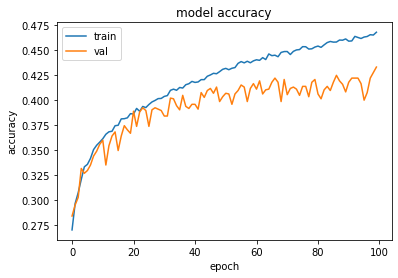

In [ ]:
import keras
from matplotlib import pyplot as plt
plt.plot(history.history['sparse_categorical_accuracy'])
plt.plot(history.history['val_sparse_categorical_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

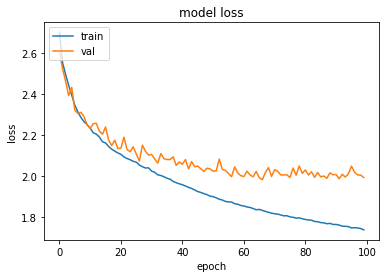

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
model.evaluate(X_test, Y_test)

390/390 [==============================] - 1s 2ms/step - loss: 1.9929 - sparse_categorical_accuracy: 0.4362


[1.9928767681121826, 0.436154842376709]

In [ ]:
y_pred = model.predict(X_test)
y_true = Y_test

In [ ]:
print(y_true)

[11 16 18 ... 16 17  0]


In [ ]:
pred = []
for i in y_pred:
  pred.append(np.argmax(i))
print(pred)

[17, 4, 18, 32, 4, 4, 35, 4, 1, 32, 32, 18, 18, 0, 32, 32, 11, 0, 18, 32, 18, 11, 18, 32, 32, 35, 18, 18, 32, 32, 27, 18, 4, 32, 17, 4, 4, 4, 4, 32, 1, 32, 0, 11, 11, 11, 11, 4, 32, 18, 11, 18, 18, 5, 31, 4, 4, 11, 11, 4, 15, 32, 4, 4, 32, 32, 32, 17, 11, 4, 11, 35, 11, 4, 11, 32, 4, 4, 4, 4, 0, 4, 11, 36, 11, 17, 18, 11, 32, 4, 11, 32, 32, 11, 4, 11, 18, 35, 4, 17, 4, 4, 4, 4, 4, 11, 11, 4, 4, 32, 35, 4, 4, 5, 4, 18, 17, 18, 4, 35, 4, 36, 32, 32, 11, 11, 4, 32, 4, 35, 18, 23, 9, 4, 4, 4, 16, 15, 11, 32, 18, 4, 5, 18, 11, 11, 11, 11, 18, 23, 4, 4, 36, 18, 32, 5, 32, 4, 18, 32, 4, 11, 5, 32, 4, 4, 32, 18, 4, 4, 4, 4, 4, 11, 18, 18, 2, 4, 11, 11, 4, 32, 32, 17, 9, 4, 32, 16, 32, 35, 35, 35, 11, 4, 32, 29, 18, 4, 4, 18, 32, 32, 4, 0, 17, 35, 5, 35, 11, 35, 4, 11, 0, 11, 4, 32, 4, 4, 4, 36, 11, 4, 18, 32, 11, 5, 4, 4, 4, 18, 0, 4, 35, 4, 18, 4, 4, 4, 18, 32, 4, 18, 11, 28, 18, 11, 11, 35, 4, 4, 35, 4, 18, 18, 4, 0, 4, 18, 32, 11, 24, 18, 18, 36, 35, 17, 18, 11, 1, 4, 4, 32, 32, 2, 29, 4, 4

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_true, pred))

              precision    recall  f1-score   support

           0       0.59      0.38      0.47       299
           1       0.48      0.19      0.27       117
           2       0.48      0.23      0.31       248
           3       0.94      0.55      0.69        62
           4       0.27      0.77      0.40      1418
           5       0.57      0.61      0.59       298
           6       0.31      0.04      0.07       120
           7       0.23      0.02      0.04       128
           8       0.15      0.02      0.03       128
           9       0.16      0.06      0.08       344
          10       0.25      0.09      0.13        67
          11       0.45      0.46      0.45      1781
          12       0.57      0.11      0.19        72
          13       0.43      0.08      0.14       112
          14       0.75      0.04      0.08       134
          15       0.31      0.13      0.18       115
          16       0.29      0.11      0.16       240
          17       0.33    

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


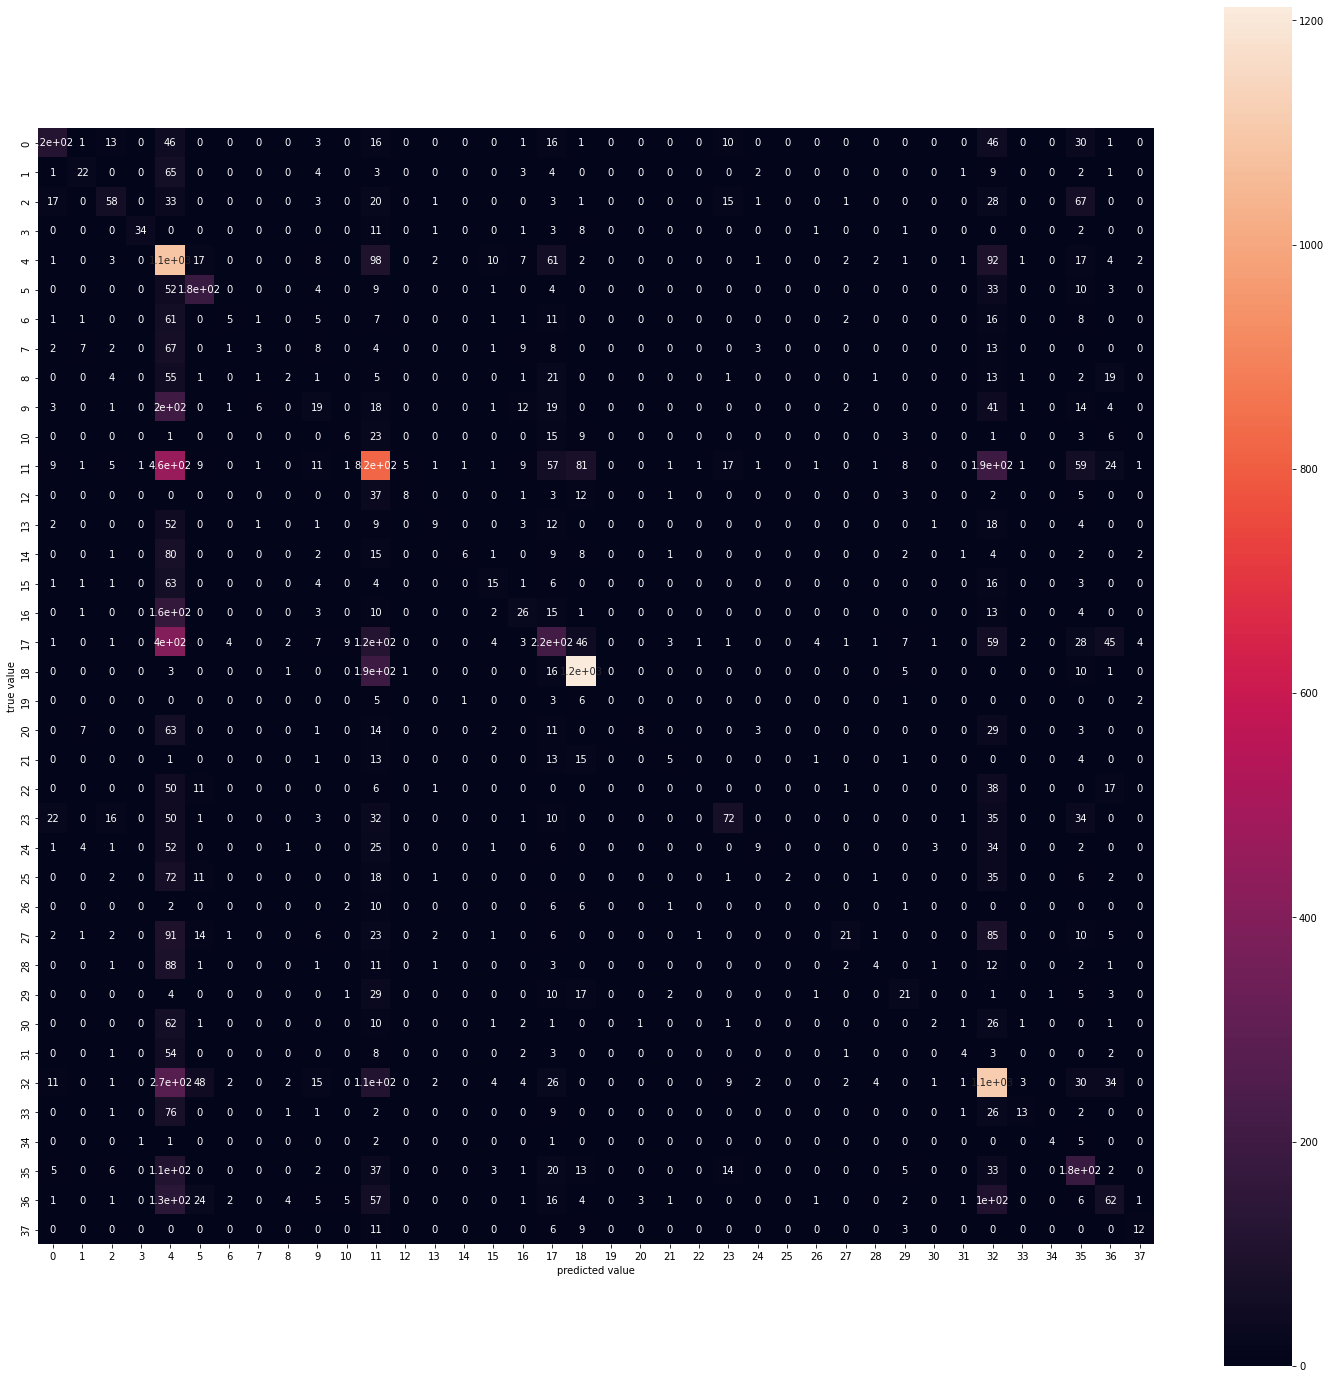

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.metrics import confusion_matrix
fig, ax = plt.subplots(figsize=(25, 25))
mat = confusion_matrix(y_true, pred)
sns.heatmap(mat,square= True, annot=True, cbar= True, ax=ax)
plt.xlabel("predicted value")
plt.ylabel("true value")
plt.show()